In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [11]:
# Load dataset
df = pd.read_csv("50_Startups.csv")
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


   R_D_spent  Administration  Marketing_Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Missing Values:
 R_D_spent          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

Summary Statistics:
            R_D_spent  Administration  Marketing_Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.

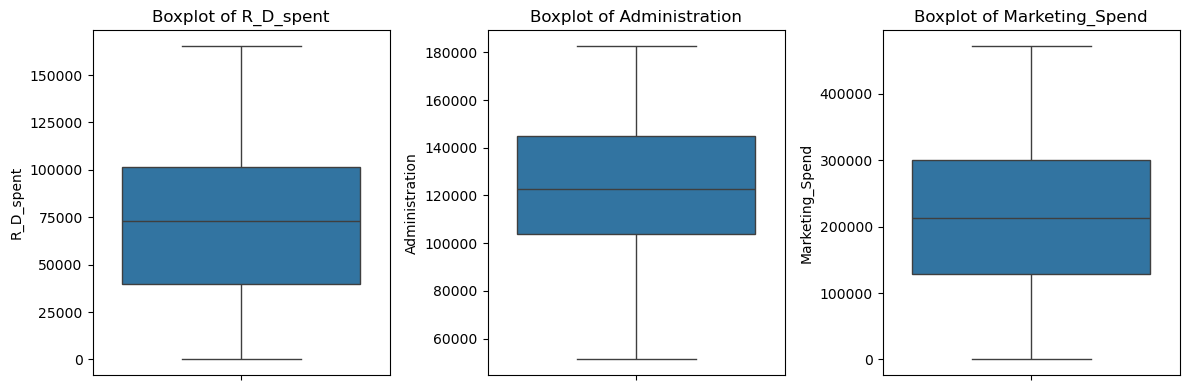

In [14]:
# -----------------------------
# EDA & Visualization
# -----------------------------

# Boxplots for outlier detection
plt.figure(figsize=(12, 4))
for i, column in enumerate(['R_D_spent', 'Administration', 'Marketing_Spend']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

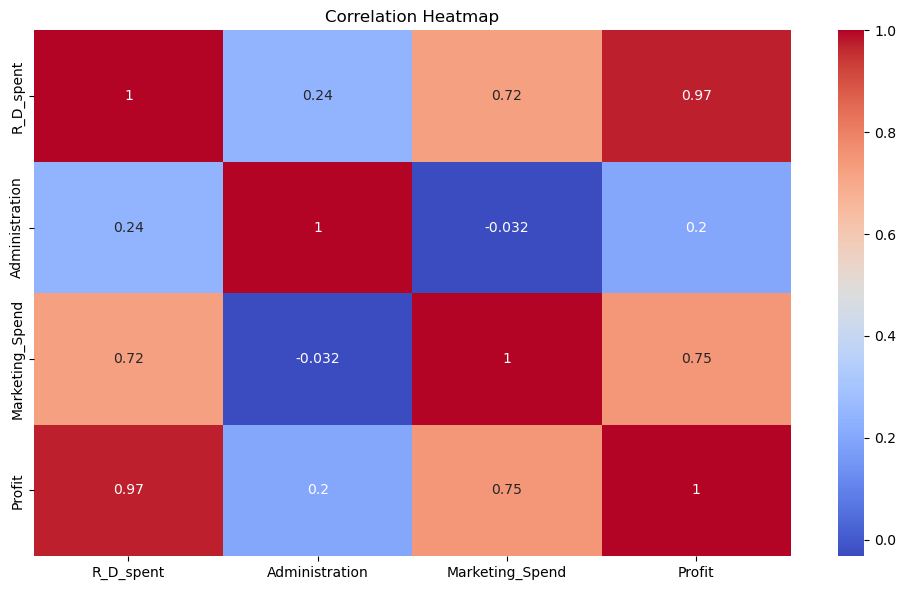

In [16]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)  # add numeric_only to avoid dtype errors
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


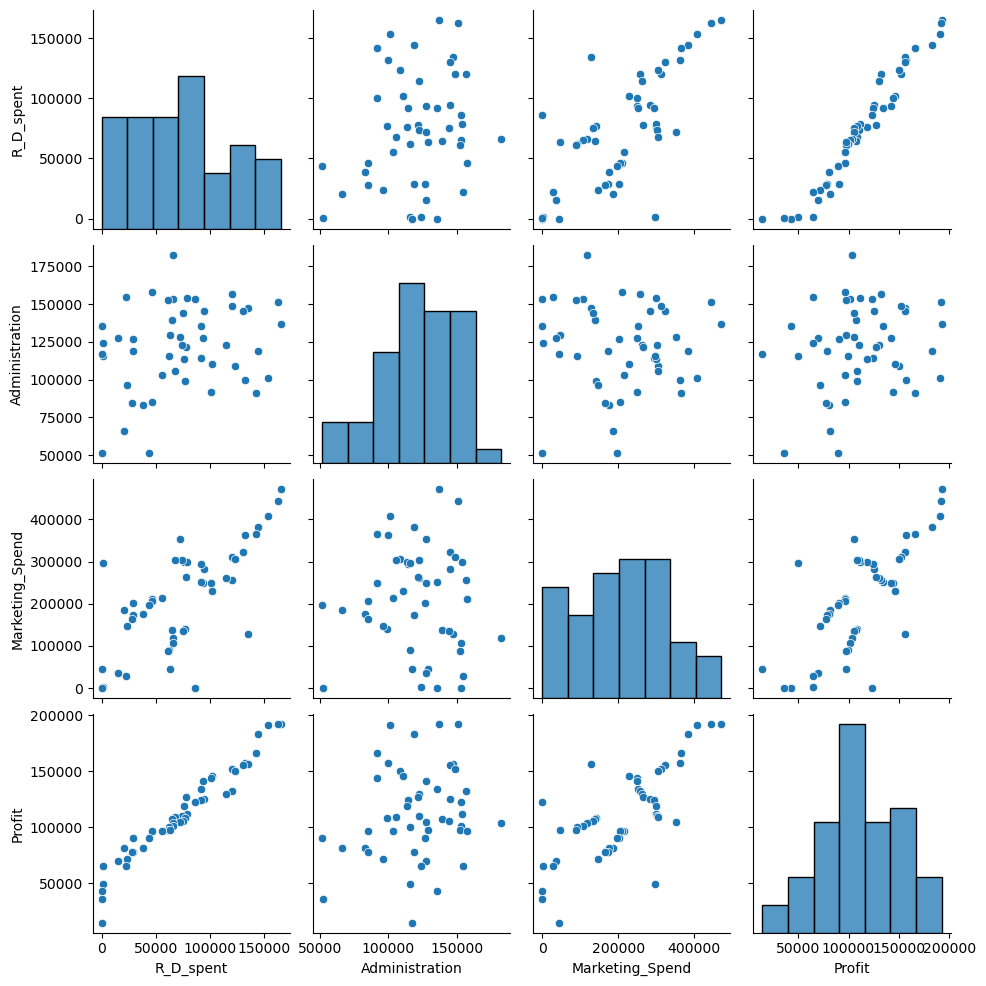

In [17]:
# Pairplot for visual bivariate relationships
sns.pairplot(df)
plt.show()


In [19]:
# -----------------------------
# Encoding and Feature Scaling
# -----------------------------
df_encoded = pd.get_dummies(df, drop_first=True)  # Drop one dummy to avoid dummy variable trap





In [22]:
# Feature scaling
scaler = StandardScaler()
scaled_columns = ['R_D_spent', 'Administration', 'Marketing_Spend']
df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])


In [24]:
print(X.dtypes)



R_D_spent          float64
Administration     float64
Marketing_Spend    float64
State_Florida         bool
State_New York        bool
dtype: object


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop the target variable
X = df_encoded.drop('Profit', axis=1)

# Convert all columns to float (important for VIF)
X = X.astype(float)

# Compute VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):\n", vif_data)



Variance Inflation Factor (VIF):
            Feature       VIF
0        R_D_spent  2.494702
1   Administration  1.177667
2  Marketing_Spend  2.401832
3    State_Florida  1.034013
4   State_New York  1.007245


In [27]:
# -----------------------------
# Train-Test Split & Modeling
# -----------------------------
y = df_encoded['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [28]:
# Evaluation
print("\nTrain R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))



Train R²: 0.9537019995248525
Test R²: 0.8987266414319837
Train RMSE: 8927.489013300057
Test RMSE: 9055.95732349781



Model Coefficients:
            Feature   Coefficient
0        R_D_spent  36608.567700
1   Administration  -1907.915124
2  Marketing_Spend   3614.336678
3    State_Florida    938.793006
4   State_New York      6.987760


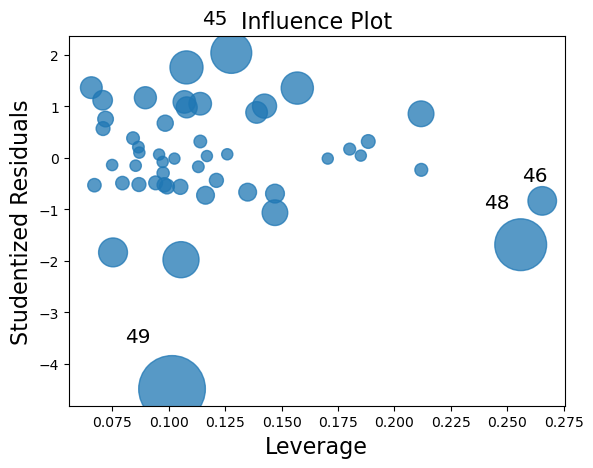

In [29]:
# -----------------------------
# Model Interpretation
# -----------------------------
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print("\nModel Coefficients:\n", coefficients)

# -----------------------------
# Influence Plot (Optional but Good Practice)
# -----------------------------
X_const = sm.add_constant(X)
model_ols = sm.OLS(y, X_const).fit()
fig = sm.graphics.influence_plot(model_ols, criterion="cooks")
plt.show()